Explore probability distributions

STEP 1: Import Libraries &  Dataset

In [10]:
# Import relevant libraries, packages, and modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [11]:
# Load data into a DataFrame and save in a variable.

data = pd.read_csv("epa_air_quality2.csv")

STEP 2: Data Exploration

In [12]:
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


In [13]:
data.shape

(260, 8)

Create a histogram to visualize the distribution of aqi_log. Then, based on its shape, visually determine if it resembles a particular distribution.

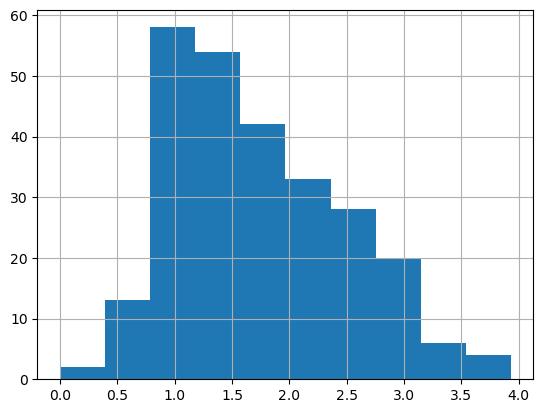

In [14]:
# Create a histogram to visualize distribution of aqi_log.

data["aqi_log"].hist();

There is a slight right skew, but it still appears to be a bell shape. This shape suggests that the distribution of this data should be approximately normal.

Another way to visually check if the data is normally distributed is to create and inspect a QQ (quantile-quantile) plot.


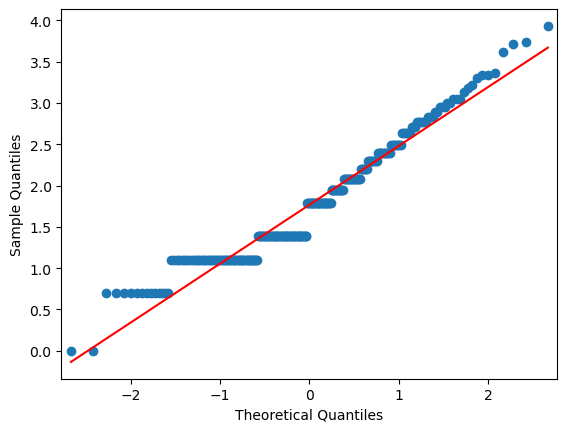

In [15]:
# Create QQ plot for aqi_log data.

fig = sm.qqplot(data["aqi_log"], line='s')
plt.show()

In the QQ plot, most of the data points follow a straight line, which indicates that a normal distribution should fit the data. Only a few regions do not follow the line. 

STEP 3: Statistical Tests

Use the empirical rule to observe the data, then test and verify that it is normally distributed.

The empirical rule states that, for every normal distribution:

    68% of the data fall within 1 standard deviation of the mean
    95% of the data fall within 2 standard deviations of the mean
    99.7% of the data fall within 3 standard deviations of the mean

First, define two variables to store the mean and standard deviation, respectively, for aqi_log. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule.


In [16]:
# Define variable for aqi_log mean.

mean_aqi_log = data["aqi_log"].mean()
print(mean_aqi_log)

1.7669210929985582


In [17]:
# Define variable for aqi_log standard deviation.

std_aqi_log = data["aqi_log"].std()
print(std_aqi_log)

0.7147155520223721


Check the first part of the empirical rule: whether 68% of the aqi_log data falls within 1 standard deviation of the mean. To compute the actual percentage of the data that satisfies this criteria, define the lower limit and the upper limit 

In [18]:
# Define variable for lower limit, 1 standard deviation below the mean.


lower_limit = mean_aqi_log - 1 * std_aqi_log


# Define variable for upper limit, 1 standard deviation above the mean.


upper_limit = mean_aqi_log + 1 * std_aqi_log


print(lower_limit, upper_limit)

1.052205540976186 2.4816366450209304


In [19]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.


((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

76.15384615384615

Determine the second part of the empirical rule: whether 95% of the aqi_log data falls within 2 standard deviations of the mean.

In [21]:
lower_limit = mean_aqi_log - 2 * std_aqi_log
upper_limit = mean_aqi_log + 2 * std_aqi_log
print(lower_limit, upper_limit)
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

0.3374899889538139 3.1963521970433026


95.76923076923077

Now, determine the third part of the empirical rule:whether 99.7% of the aqi_log data falls within 3 standard deviations of the mean.

In [22]:
lower_limit = mean_aqi_log - 3 * std_aqi_log
upper_limit = mean_aqi_log + 3 * std_aqi_log
print(lower_limit, upper_limit)
((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

-0.37722556306855815 3.9110677490656744


99.61538461538461

STEP 4: Results and Evaluation


    About 76.15% of the data falls within 1 standard deviation of the mean.
    About 95.77% of the data falls within 2 standard deviation of the mean.
    About 99.62% of the data falls within 3 standard deviations of the mean.

The 95.77% is very close to 95%, and the 99.62% is very close to 99.7%. The 76.15% is not as close to 68%, but relatively close. Overall, from applying the empirical rule, the data appears to be not exactly normal, but could be considered approximately normal.



Z-score could be used to identify values that lie more than 3 standard deviations below or above the mean. These values may be considered outliers.

In [23]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.

data["z_score"] = stats.zscore(data["aqi_log"])
data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.438109
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034820
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.936873
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.533584
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.533584


In [24]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean

data[(data["z_score"] > 3) | (data["z_score"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.034886


Detecting outliers is important because they can reveal two important things, depending on the context: First, they can identify measurements that were taken incorrectly. Second, they can highlight parts of the data that can be focused on to make improvements.

For example, if the aqi_log for West Phoenix is considered an outlier, then that site can be studied further to determine what practices or changes might improve the air quality.